# Exploratory Data Analysis on 1000 Movies Data

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [Pre profiling](#section305)<br/>
    - 3.2 [Preprocessing](#section306)<br/>
    - 3.3 [Post Profiling](#section307)<br/>
- 4. [Questions](#section4)
    - 4.1 [Movies count per Year?](#section401)<br/>
    - 4.2 [What are highest rated movies?](#section402)<br/>
    - 4.3 [What are  highest revenue movies?](#section403)<br/>
    - 4.4 [Which are top lengthy movies?](#section404)<br/>
    - 4.5 [Movies by Genre?](#section405)<br/>
    - 4.6 [Percentage of Total Movies Made From top 5 Genre?](#section406)<br/>
    - 4.7 [Percent of Total Revenue from Top 5 Genres](#section407)<br/>
    - 4.8 [Most Active Directors Revenue Contribution](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
- 5. [Conclusions](#section5)<br/>      

<a id=section1></a> 
            
## 1. Problem Statement !!  
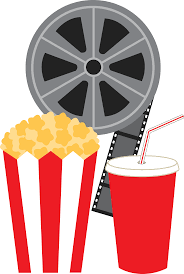


"This dataset contains the details of top 1000 movies released between the years  2006 and 2016" 
<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is the study on 1000 movies data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference. 

<a id=section102></a> 
### 1.2. Data source

    How was it collected? 

- __Name__: "1000 Movies Data"
- __Source__: GitHub
- __Data Colected Between__: 2006 to 2016
- __Description__:   "This data set gives details of top 1000 movies released between the years 2006 to 2016"

 

<a id=section2></a> 
### 2. Load the packages and data 

In [1]:
import numpy as np                                                             #Import Packages
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as bk
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

movies=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")




<a id=section3></a> 
### 3. Data Profiling
- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

In [2]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

   ".dtype" command will display the data type of each variable of the data set.
   From the above table we observe that our data set contains:
  -  5  Object type
  -  3  Float  type and 
  -  4  Int    type
   


In [4]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


".head" command is used to display first five records of the data set


In [5]:
movies.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


".tail" command is used to display last five records of the data set

In [6]:
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

".isnull()" is used to find the null values from the data set and "sum()" is used for summation 
From above table we observe that there are missing values in "Revenue (Millions) and "Metascore" columns.

<a id=section305></a> 
### 3.1 Pre Profiling

In [3]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="movies_befor_Processing.html")

Observations from "movies_befor_processing.html" file

- The following variables have null values that may need to addressed.
 - <strong>Revenue(Millions) </strong>
  - <strong>Metascore </strong>
- categorical variable are again grouped that may need to addressed.


<a id=section306></a> 
### 3.2 Preprocesing

- Dealing with missing values<br/>
We will replace the missing values by grouping "Rating" column for which we have divided all the movies into four parts (__0 to 2.5, 2.5 to 5.0, 5.0 to 7.5 and 7.5 to 10.0__)
    - Replacing missing values of __Revenue (Millions)__ with median of grouped values.
    - Replacing missing values of __Metascore__ with median of grouped values.
    
    


In [3]:
data1=movies[(movies['Rating'] >0) & (movies['Rating']<=2.5)]
data1['Revenue (Millions)']=data1['Revenue (Millions)'].fillna(data1['Revenue (Millions)'].median())
data1['Metascore']=data1['Metascore'].fillna(data1['Metascore'].median())
data1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0


In [4]:
data2=movies[(movies['Rating'] >2.5) & (movies['Rating']<=5.0)]
data2['Revenue (Millions)']=data2['Revenue (Millions)'].fillna(data2['Revenue (Millions)'].median())
data2['Metascore']=data2['Metascore'].fillna(data2['Metascore'].median())
data2

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.010,38.0
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,31.585,38.0
49,50,The Last Face,Drama,A director (Charlize Theron) of an internation...,Sean Penn,"Charlize Theron, Javier Bardem, Adèle Exarchop...",2016,130,3.7,987,31.585,16.0
63,64,Fifty Shades of Grey,"Drama,Romance,Thriller",Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,166.150,46.0
155,156,Aliens vs Predator - Requiem,"Action,Horror,Sci-Fi",Warring alien and predator races descend on a ...,Colin Strause,"Reiko Aylesworth, Steven Pasquale,Shareeka Epp...",2007,94,4.7,97618,41.800,29.0
229,230,Rupture,"Horror,Sci-Fi,Thriller",A single mom tries to break free from a myster...,Steven Shainberg,"Noomi Rapace, Michael Chiklis, Kerry Bishé,Pet...",2016,102,4.8,2382,31.585,35.0
237,238,The Disappointments Room,"Drama,Horror,Thriller",A mother and her young son release unimaginabl...,D.J. Caruso,"Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...",2016,85,3.9,4895,2.410,31.0
250,251,Bonjour Anne,"Comedy,Drama,Romance",Anne is at a crossroads in her life. Long marr...,Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,4.9,178,0.320,50.0
265,266,Knock Knock,"Drama,Horror,Thriller",A devoted father helps two stranded young wome...,Eli Roth,"Keanu Reeves, Lorenza Izzo, Ana de Armas, Aaro...",2015,99,4.9,53441,0.030,53.0
269,270,Satanic,Horror,Four friends on their way to Coachella stop of...,Jeffrey G. Hunt,"Sarah Hyland, Steven Krueger, Justin Chon, Cla...",2016,85,3.7,2384,31.585,38.0


In [5]:
data3=movies[(movies['Rating'] >5.0) & (movies['Rating']<=7.5)]
data3['Revenue (Millions)']=data3['Revenue (Millions)'].fillna(data3['Revenue (Millions)'].median())
data3['Metascore']=data3['Metascore'].fillna(data3['Metascore'].median())
data3

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,45.11,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
14,15,Colossal,"Action,Comedy,Drama",Gloria is an out-of-work party girl forced to ...,Nacho Vigalondo,"Anne Hathaway, Jason Sudeikis, Austin Stowell,...",2016,109,6.4,8612,2.87,70.0


In [6]:
data4=movies[(movies['Rating'] >7.5) & (movies['Rating']<=10.0)]
data4['Revenue (Millions)']=data4['Revenue (Millions)'].fillna(data4['Revenue (Millions)'].median())
data4['Metascore']=data4['Metascore'].fillna(data4['Metascore'].median())
data4

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
11,12,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.27,74.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
13,14,Moana,"Animation,Adventure,Comedy","In Ancient Polynesia, when a terrible curse in...",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,7.7,118151,248.75,81.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
21,22,Manchester by the Sea,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.70,96.0
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,76.0


In [7]:
new_movies=pd.concat([data1,data2,data3,data4])
new_movies.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

- We have replaced the null values with grouped medians
- Now we see no missing values for "Revenue" and "Metascore" columns.

<a id=section307></a> 
### 3.3 Post Profiling


In [25]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(new_movies)
profile.to_file(outputfile="movies_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values.
Rejected the "Index" column since it is highly coorelated with "Rank"
The pandas profiling report which we have generated after preprocessing will give us more beneficial insights. We can compare the two reports, i.e __movies_after_preprocessing.html__ and __movies_befor_preprocessing.html__.<br/>
In movies_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 


<a id=section4></a> 
### 4. Questions

<a id=section401></a> 
### 4.1 Movies count per Year?

Text(0.5, 1.0, 'Movies Count by Year')

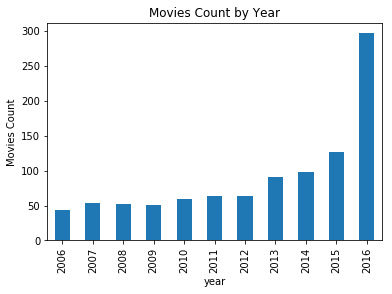

In [8]:
movies_count_year=new_movies['Year'].value_counts().sort_index().plot.bar()
movies_count_year.set_xlabel('year')
movies_count_year.set_ylabel('Movies Count')
movies_count_year.set_title('Movies Count by Year')

- In the year 2016 highest number of movies released
- There are slight varaiations in movies count from year 2006 o 2012

<a id=section402></a> 
### 4.2 What are highest rated movies

8.1    26
8.2    10
8.3     7
8.5     6
8.4     4
8.6     3
8.8     2
9.0     1
Name: Rating, dtype: int64

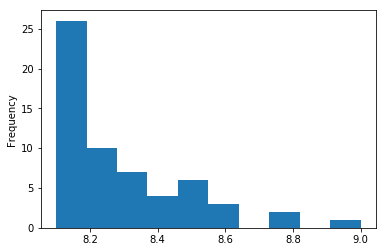

In [11]:
new_movies[new_movies['Rating'] > 8.0]['Rating'].plot.hist()
new_movies[new_movies['Rating'] > 8.0]['Rating'].value_counts()

- There are 26 movies with 8.1 rating
- There is only one movie with rating 9.0, which is the top rated movie.

In [11]:
new_movies.nlargest(5,'Rating')[['Title','Director','Rating','Revenue (Millions)']].set_index('Title')

,Director,Rating,Revenue (Millions)
Title,,,
The Dark Knight,Christopher Nolan,9.0,533.32
Inception,Christopher Nolan,8.8,292.57
Dangal,Nitesh Tiwari,8.8,11.15
Interstellar,Christopher Nolan,8.6,187.99
Kimi no na wa,Makoto Shinkai,8.6,4.68


- We observe that Christoper Nolan has 3 entries in top 5 movies.
- The Dark Knight” is the highest rated movie with rating 9.0.
- Among top 5 rated movies, revenue generated by director “Nolan” is exponentially high when compared to other two directors in the list.



In [13]:
new_movies.groupby('Year').mean()[['Rating']].nlargest(10,'Rating')

,Rating
Year,
2007,7.133962
2006,7.125000
2009,6.960784
2012,6.925000
2011,6.838095
2014,6.837755
2010,6.826667
2013,6.812088
2008,6.784615


- In terms of average rating of all movies, 2007 was the best year.


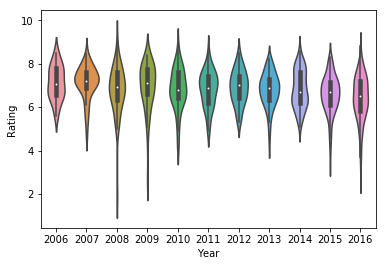

In [9]:
new_movies_yearwise_rating=new_movies[['Year','Rating']]
ax = sb.violinplot(x="Year", y="Rating", data=new_movies_yearwise_rating)

- The above violin plot shows the distribution of rating in a given year. 2008 sees the maximum number variance. It has seen best rated movie and poor rated movie in the same year.

<a id=section403></a> 
### 4.3 What are  highest revenue movies

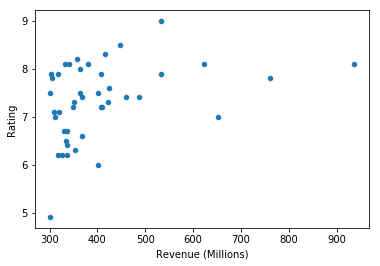

In [17]:
new_movies[new_movies['Revenue (Millions)'] > 300].plot.scatter(x='Revenue (Millions)', y='Rating')

- There are only 5 movies which crossed the 500 Million Revenue
- There are 10 movies which is between 400 to 500 Million club

In [23]:
new_movies.nlargest(5,'Revenue (Millions)')[['Title','Director','Rating','Revenue (Millions)']].set_index('Title')

,Director,Rating,Revenue (Millions)
Title,,,
Star Wars: Episode VII - The Force Awakens,J.J. Abrams,8.1,936.63
Avatar,James Cameron,7.8,760.51
Jurassic World,Colin Trevorrow,7.0,652.18
The Avengers,Joss Whedon,8.1,623.28
The Dark Knight,Christopher Nolan,9.0,533.32


- Star Wars : Episode VII tops the list in terms of revenue collection with $936.63 millions.
- Though “The Dark Knight” has good rating than “Star Wars”, it is in the 5th place of the top 5 list.

<a id=section404></a> 
### 4.4 Which are top lengthy movies

In [11]:
new_movies.nlargest(5,'Runtime (Minutes)')[['Title','Director','Rating','Runtime (Minutes)']].set_index('Title')

,Director,Rating,Runtime (Minutes)
Title,,,
Grindhouse,Robert Rodriguez,7.6,191
The Hateful Eight,Quentin Tarantino,7.8,187
Inland Empire,David Lynch,7.0,180
The Wolf of Wall Street,Martin Scorsese,8.2,180
La vie d'Adèle,Abdellatif Kechiche,7.8,180


- Grindhouse is the movie with maximum run time of more than 3 hours
- There is only 5 minutes variation between top 1 and 2 lengthy  films.


In [21]:
new_movies.nlargest(5,'Votes')[['Title','Director','Revenue (Millions)','Votes']].set_index('Title')

,Director,Revenue (Millions),Votes
Title,,,
The Dark Knight,Christopher Nolan,533.32,1791916
Inception,Christopher Nolan,292.57,1583625
The Dark Knight Rises,Christopher Nolan,448.13,1222645
Interstellar,Christopher Nolan,187.99,1047747
The Avengers,Joss Whedon,623.28,1045588


- Highest number of votes got for "The Dark Knight" movie.
- "Christopher Nolan" movies are the top 4  voted movies of the list.


<a id=section405></a> 
### 4.5 Movies by Genre?

- Since most of these films in the data set are part of multiple genres, we need to get a list of unique Genre


In [11]:
import itertools
unique_genres = new_movies['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Number of movies in each genre: 

Sport 18
Horror 119
Romance 141
Western 7
War 13
Crime 150
Mystery 106
Family 51
Comedy 279
Fantasy 101
Adventure 259
Animation 49
Action 303
Sci-Fi 120
Drama 513
Biography 81
Musical 5
History 29
Thriller 195
Music 21


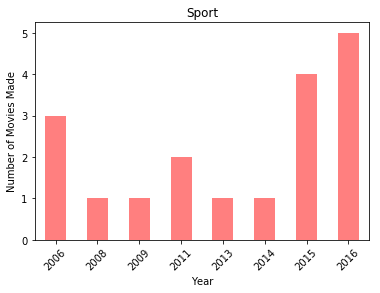

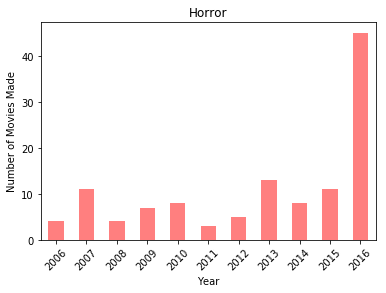

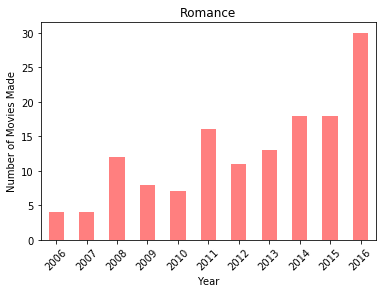

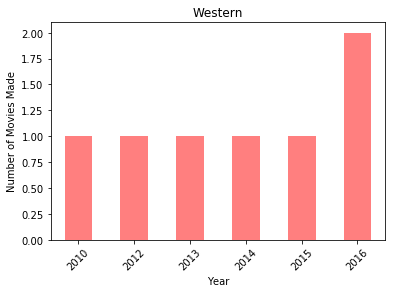

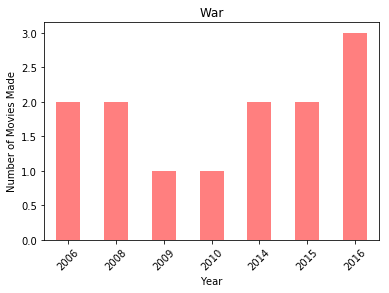

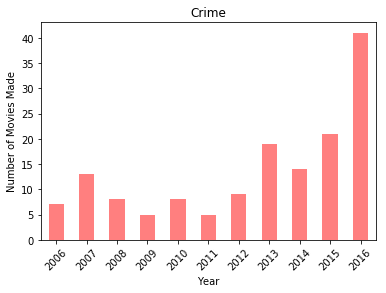

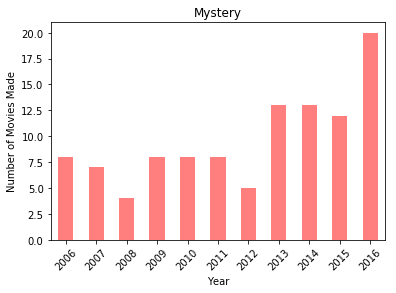

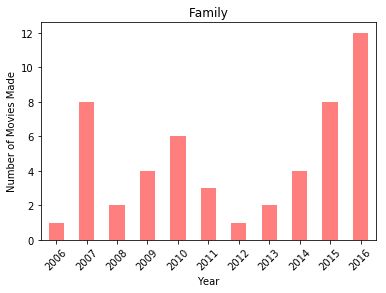

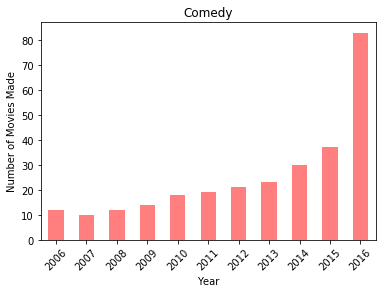

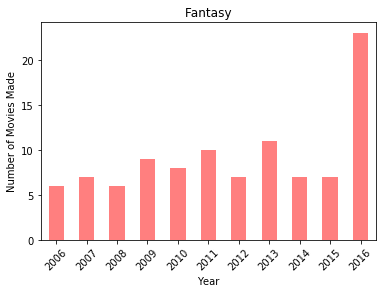

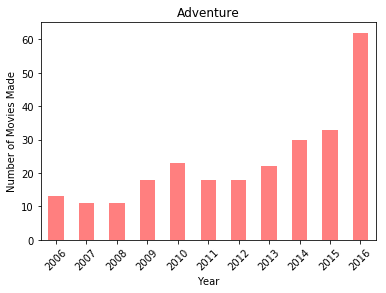

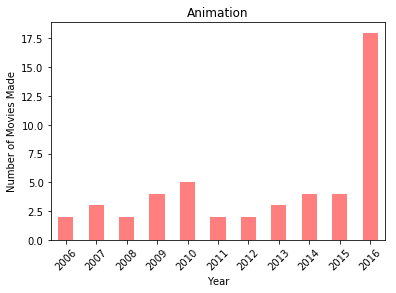

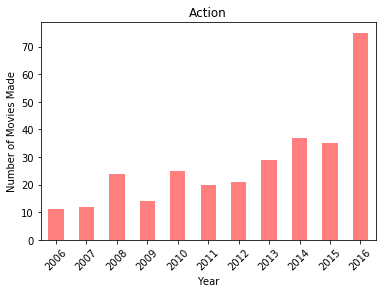

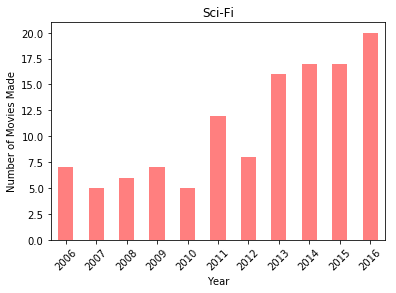

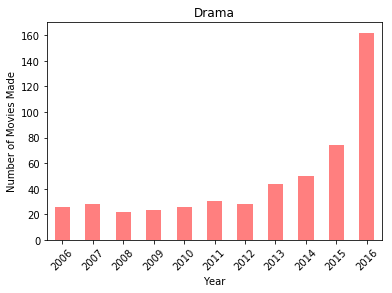

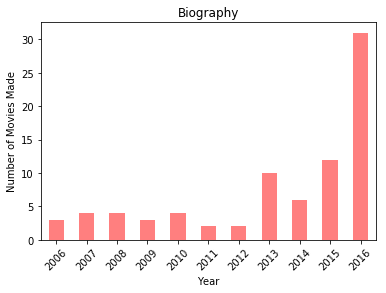

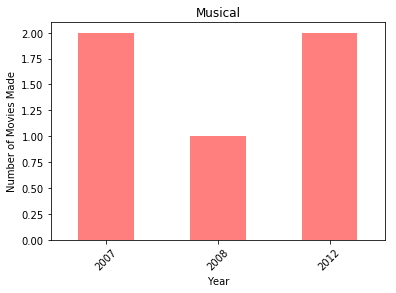

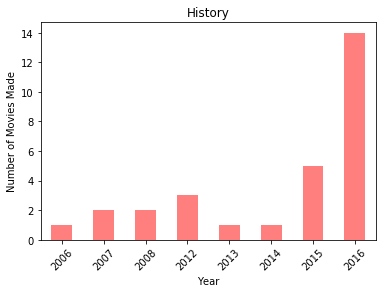

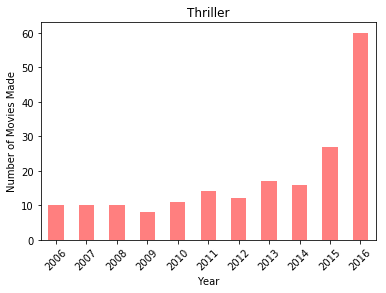

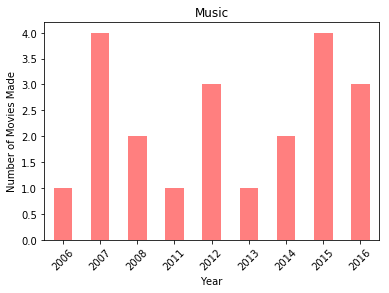

In [12]:
print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = new_movies['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    new_movies[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(new_movies[current_genre]))

- Now we will find the percent of total entries are attributed to each genre.
- since some films have multiple genres, these percentages won't add to 100%.

In [13]:
genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = new_movies['Genre'].str.contains(genre)
    pct = len(new_movies[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
genre_pcts_df= pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Sport,1.8
Horror,11.9
Romance,14.1
Western,0.7
War,1.3
Crime,15.0
Mystery,10.6
Family,5.1
Comedy,27.9
Fantasy,10.1


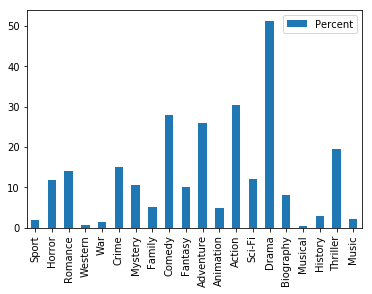

In [14]:
genre_pcts_df.plot.bar()


<a id=section406></a> 
### 4.6 Percentage of Total Movies Made From top 5 Genre?

- Taking a sum of the total movies made from the top 5 genres,which contributed to the most in terms of movies made?

Text(0.5, 1.0, 'Percent of Total Movies Made from Top 5 Genres')

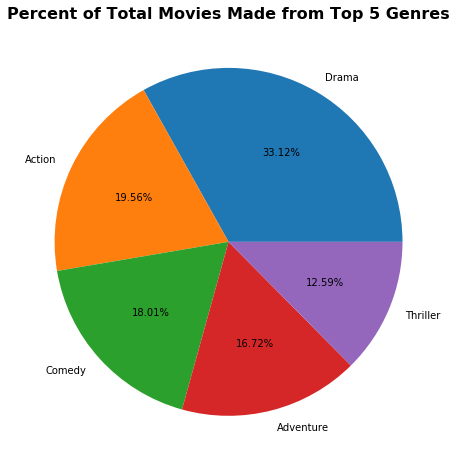

In [15]:
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

- Above chart dipalys the Percent of Total Movies Made from Top 5 Genres
- Genre: "Drama" tops the list with 33.12% and Genre: Thriller with 12.59% is at 5th position

<a id=section407></a> 
### 4.7 Percent of Total Revenue from Top 5 Genres

In [71]:
genre_revenue_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = new_movies['Genre'].str.contains(genre).fillna(False)
    revenue_pct = new_movies[current_genre].xs('Revenue (Millions)', axis=1).sum() / new_movies['Revenue (Millions)'].sum() * 100
    genre_revenue_pcts[i] = revenue_pct
    i += 1

genre_revenue_pcts_df = pd.DataFrame(genre_revenue_pcts, index=individual_genres, columns=['Percent'])
genre_revenue_pcts_df    

,Percent
Animation,11.659414
Comedy,26.065832
Mystery,7.265517
Romance,7.810410
Biography,5.725350
Crime,11.427100
Horror,5.754114
History,1.917432
Western,0.813935
Sport,1.447715


Text(0.5, 1.0, 'Percent of Total Revenue from Top 5 Genres')

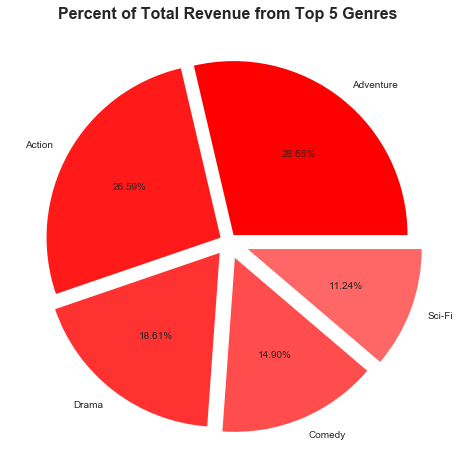

In [88]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Revenue from Top 5 Genres', weight='bold', fontsize=16)

- Above chart dipalys the Percent of Total Revenue from Top 5 Genres
- Genre: "Adventure" tops the list with 28.66% and Genre: Sci-Fi with 11.24% is at 5th position

<a id=section408></a> 
### 4.8 Most Active Directors Revenue Contribution

In [17]:
most_active_directors = new_movies['Director'].value_counts().head(10)
most_active_directors.index

Index(['Ridley Scott', 'Paul W.S. Anderson', 'Michael Bay', 'David Yates',
       'M. Night Shyamalan', 'Danny Boyle', 'David Fincher', 'Justin Lin',
       'Martin Scorsese', 'Zack Snyder'],
      dtype='object')

In [18]:
director_revenue_totals = np.zeros(len(most_active_directors))
i = 0
for director in most_active_directors.index:
    current_director = new_movies['Director'].str.contains(director)
    director_film_revenue = new_movies[current_director].xs('Revenue (Millions)', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=most_active_directors.index, columns=['Revenue (Millions)'])
director_revenue_totals_df

,Revenue (Millions)
Ridley Scott,719.060
Paul W.S. Anderson,208.920
Michael Bay,1421.320
David Yates,1630.510
M. Night Shyamalan,402.075
Danny Boyle,183.400
David Fincher,527.720
Justin Lin,824.790
Martin Scorsese,458.110
Zack Snyder,975.740


Text(0.5, 1.0, 'Most Active Directors Revenue Contribution')

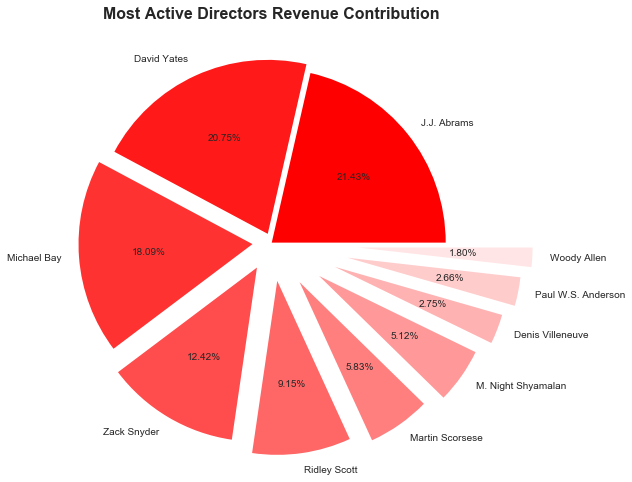

In [80]:
explode = np.linspace(0, 0.5, 10)
colors = ['#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc', '#ffe5e5', ]
director_revenue_totals_df.sort_values(by='Revenue (Millions)', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=16)

- Above chart dipalys the Most Active Directors Revenue Contribution
- Director "J.J Abrams" is at top with 21.43% of total Revenue contributed, which is 1683.450 Millions.
- With 1.80% which is 141.190 Millions, director "Woody Allen" is the last in top 10 list

<a id=section5></a>
## Conclusions

- 1000 movies data set is the collection of top 1000 movies released between the year 2006 to 2016(__From: Section 1.2__)
-  2016 is the year in which highest  number of movies released (__From : Section 4.1__)
- The Dark Knight” is the highest rated movie with rating 9.0 and the year 2008 sees the maximum number variance. It has seen best rated movie and poor rated movie in the same year.(__from: Section: 4.2__)
- Star Wars : Episode VII tops the list in terms of revenue collection with $936.63 millions(__From: Section: 4.3__)
- Grindhouse is the movie with maximum run time of more than 3 hours(__From: Section: 4.4__)
- In terms of Percent of Total Movies Made from Top 5 Genres, Genre: "Drama" tops the list with 33.12% (__From: Section: 4.6__)
- In terms of Percent of Total Revenue from Top 5 Genres, Genre: "Adventure" tops the list with 28.66%(__From: Section: 4.7__)
- In terms of Most Active Directors Revenue Contribution, Director "J.J Abrams" is at top with 21.43%(__From Section: 4.7__)
- From Analysis we conclude that Genre and director play an important role in success of a movie.